# MDI 230 - Sujet Trotinettes
### Groupe AL (pour Albert&Léon)
Léon Sillano - Albert Noubissi

### 1) Modélisation

La modélisation de ce problème utilise le modèle des colonies. Pour ce faire, nous allons dans un premier temps exprimer ce modèle en processus de Markov dans lequel on définit :
- Les individus : vélos, dont le nombre est $N$
- Les colonies : les états que peuvent prendre ces vélos. Il y a les états :
    - **D** Disponible : les trotinettes restent dans cet état un temps suivant une loi exponentielle paramètre $\lambda$, et au bout de ce temps elles sont en utilisation par un client (**U**)
    - **U** En utilisation: le temps passé suit une loi exp. de param. $1/t_{utilisation}$, elles peuvent ensuite tomber en panne avec une proba. $p_{panne}$, tomber à court de batterie avec une proba. $p_{vide}$, ou bien être disponible avec une proba $1-p_{panne}-p_{vide}$.
    - **Irech** En intervention pour recharge : le temps passé suit une loi exp. de param. $1/t_{intervention}$, elles vont enuite en recharge.
    - **Rech** En recharge : le temps passé suit une loi exp. de param. $1/t_{recharge}$, elles sont ensuite disponible.
    - **Irep** En intervention pour réparation : le temps passé suit une loi exp. de param. $1/t_{intervention}$, elles vont enuite en réparation.
    - **Rép** En réparation : le temps passé suit une loi exp. de param. $1/t_{réparation}$, elles sont ensuite disponible.
    
- $$E = \{(n_D, n_U, n_{Irech}, n_{Irep}, n_{Rech}, n_{Rep}) / \sum_{n\in colonies}{} n = N\}$$

![](graph_simple.svg)

Pour calculer les taux de transition, on découpe ce taux en deux fonctions $\forall{i,j} \in E, q(n,T_{i,j})=\phi_i(n_i)\lambda_{ij}$ de la façon suivante :
- $\phi_i(n_i)$ est une fonction qui dépend du nombre d'individus dans la colonie de départ $i$
- $\lambda_{ij}$ est le taux de transition de $i$ vers $j$

Ces valeurs sont indiqués sur le graphe ci-dessous. Quelques précisions sur ces valeurs :
- $\phi_D(n_D)=\mathbb{1}_{n_D>0}$ car les trotinettes sont sélectionnées une par une.
- Pour toutes les autres états $i$, $\phi_D(n_i)=n_i$ car les trotinettes sont :
    - Utilisées en parallèles (font le voyage en même temps) pour U
    - En attente d'intervention et traitées en parallèle car on suppose qu'il y a assez de réparateurs et de prestataire pour qu'elles n'aient pas besoin de suivre une file d'attente.
- $\lambda_{ij} = \mu p_{i \rightarrow j}$ où $\mu$ est le coefficient de la loi exponentielle modélisant le temps passé dans l'état $i$ et $p_{i \rightarrow j}$ la probabilité de passer de l'état $i$ vers $j$. Par ex :
    - $p_{U \rightarrow Irech} = p_{vide}$
    - $p_{D \rightarrow U} = 1$
    - ...


![](graph_complete.jpg)

### 2) Calibrage

Selon les valeurs de l'énoncé, on a :
- $q_{D \rightarrow U} = 0,1$ $ . $ $ \mathcal{1}_{n_D}$ $min^{-1}$
- $q_{U \rightarrow D} = 0,178$ $ . $ $ n_U $ $  min^{-1}$
- $q_{U \rightarrow Irech} = 0,02$ $ . $ $ n_U $ $  min^{-1}$
- $q_{U \rightarrow Irep} = 0,002$ $ . $ $ n_U $ $  min^{-1}$
- $q_{Irech \rightarrow Rech} = 0,033$ $ . $ $ n_{Irech} $ $  min^{-1}$
- $q_{Irep \rightarrow Rep} = 0,033$ $ . $ $ n_{Irep} $ $  min^{-1}$
- $q_{Rech \rightarrow D} = 0,0042$ $ . $ $ n_{Rech} $ $  min^{-1}$
- $q_{Rep \rightarrow D} = 0,0014$ $ . $ $ n_{Rep} $ $  min^{-1}$

### 3) Probabilité stationnaire

Pour calculer la probabilité stationnaire, on calcule les équations de trafic :
- U : $$\frac{\alpha_U}{t_{trajet}} = \alpha_D\lambda$$
- D : $$\alpha_D \lambda = \frac{\alpha_{Rech}}{t_{recharge}} + \frac{\alpha_{Rep}}{t_{reparation}} + \frac{\alpha_{U}(1-p_{vide}-p_{panne})}{t_{trajet}}$$
- Irech : $$\frac{\alpha_{Irech}}{t_{intervention}} = \frac{\alpha_{U}.p_{vide}}{t_{trajet}}$$
- Irep : $$\frac{\alpha_{Irep}}{t_{intervention}} = \frac{\alpha_{U}.p_{panne}}{t_{trajet}}$$
- Rech : $$\frac{\alpha_{Rech}}{t_{recharge}} = \frac{\alpha_{Irech}}{t_{intervention}}$$
- Rep : $$\frac{\alpha_{Rep}}{t_{reparation}} = \frac{\alpha_{Irep}}{t_{intervention}}$$

On ajoute la condition de normalisation sur les $\alpha$ :
$$\alpha_U+\alpha_D+\alpha_{Irech}+\alpha_{Irep}+\alpha_{Rech}+\alpha_{Rep}=1$$

En réécrivant la condition de normalisation sur $\alpha_U$ dans le même ordre que ci dessus :
$$\alpha_U(1+\frac{1}{\lambda t_{trajet}}+\frac{p_{vide}t_{intervention}}{t_{trajet}}+\frac{p_{panne}t_{intervention}}{t_{trajet}}+\frac{p_{vide}t_{recharge}}{t_{trajet}}+\frac{p_{panne}t_{réparation}}{t_{trajet}}) = 1$$

D'où $$\alpha_U = \frac{1}{1+\frac{1}{\lambda t_{trajet}}+\frac{p_{vide}t_{intervention}}{t_{trajet}}+\frac{p_{panne}t_{intervention}}{t_{trajet}}+\frac{p_{vide}t_{recharge}}{t_{trajet}}+\frac{p_{panne}t_{réparation}}{t_{trajet}} }$$

Numériquement, on trouve $\alpha_U = 0.101$

On trouve ensuite les autres valeurs de $\alpha$ :
- $\alpha_U = 0.101$
- $\alpha_D = 0.202$
- $\alpha_{Irech} = 0.061$
- $\alpha_{Irep} = 0.006$
- $\alpha_{Rech} = 0.488$
- $\alpha_{Rep} = 0.144$

Ainsi, la probabilité stationnaire s'écrit :
$$\pi(n) = \frac{1}{K}\alpha_D^{n_D}\frac{\alpha_U^{n_U}}{n_U!}\frac{\alpha_{Irech}^{n_{Irech}}}{n_{Irech}!}\frac{\alpha_{Irep}^{n_{Irep}}}{n_{Irep}!}\frac{\alpha_{Rech}^{n_{Rech}}}{n_{Rech}!}\frac{\alpha_{Rep}^{n_{Rep}}}{n_{Rep}!}$$

Où $K = \sum_{E} \pi(n)$ est la constante de normalisation

### 4) Simulation sur 100h

Pour faire cette simulation, on considère un vélo et on simule les états qu'il va prendre. On comparera ensuite avec notre probabilité stationnaire calculée.

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

Etat final des N=100 vélos au bout de 100.0 heures :  {'D': 0, 'U': 9, 'Irech': 9, 'Irep': 0, 'Rech': 64, 'Rep': 18} 

Historique des états :

           Etat             Temps passé (min)   Temps cumulé (min)

(D,U,Irech,Irep,Rech,Rep)

  (100, 0, 0, 0, 0, 0)           0.1                   0.1
  (99, 1, 0, 0, 0, 0)            0.1                   0.2
  (98, 2, 0, 0, 0, 0)            0.1                   0.2
  (97, 3, 0, 0, 0, 0)            0.1                   0.3
  (96, 4, 0, 0, 0, 0)            0.1                   0.4
  (95, 5, 0, 0, 0, 0)            0.1                   0.5
  (94, 6, 0, 0, 0, 0)            0.0                   0.6
  (93, 7, 0, 0, 0, 0)            0.1                   0.7
  (92, 8, 0, 0, 0, 0)            0.1                   0.7
  (91, 9, 0, 0, 0, 0)            0.4                   1.1

                     [...]


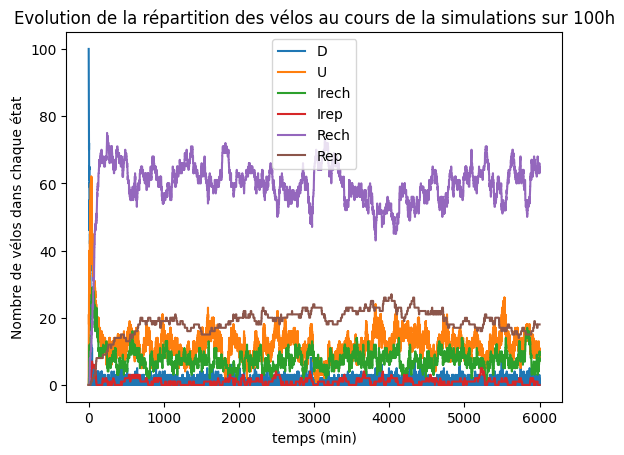

In [11]:
N = 100
total_time = 100*60  # 100 heures

lambda_ = 0.1
ttrajet = 5
ppanne = 0.01
pvide = 0.1
tintervention = 30
trecharge = 240
treparation = 720

############################## FONCTION PERMETTANT DE CALCULER L'ETAT SUIVANT DANS UNE SIMULATION ################################

def get_next_state(state: dict):
    # On simule la VAR du temps passé comme étant le minimum des lois exp de toute les transitions
    weights = [
        lambda_*(state["D"] > 0),  # D vers U
        (1-pvide-ppanne)/ttrajet*state["U"],  # U vers D
        pvide/ttrajet*state["U"],  # U vers IRech
        ppanne/ttrajet*state["U"],  # U vers IRep
        1/tintervention*state["Irech"],  # IRech vers Rech
        1/tintervention*state["Irep"],  # IRep vers Rep
        1/trecharge*state["Rech"],  # Rech vers D
        1/treparation*state["Rep"],  # Rep vers D
    ]

    # Temps passé avant le 1er changement
    time_spent = np.random.exponential(scale=1/sum(weights))
    transition = random.choices(["DU", "UD", "UIrech", "UIrep", "IrechRech", "IrepRep",
                                "RechD", "RepD"], weights=weights, k=1)[0]  # On choisit la prochaine transition
    
    new_state = {"D": state["D"], "U": state["U"], "Irech": state["Irech"], "Irep": state["Irep"],
                 "Rech": state["Rech"], "Rep": state["Rep"] }

    # On change l'état en fonction de la prochaine transition
    if transition == "DU":
        new_state["D"] -= 1
        new_state["U"] += 1

    elif transition == "UD":
        new_state["U"] -= 1
        new_state["D"] += 1

    elif transition == "UIrech":
        new_state["U"] -= 1
        new_state["Irech"] += 1

    elif transition == "UIrep":
        new_state["U"] -= 1
        new_state["Irep"] += 1

    elif transition == "IrechRech":
        new_state["Irech"] -= 1
        new_state["Rech"] += 1

    elif transition == "IrepRep":
        new_state["Irep"] -= 1
        new_state["Rep"] += 1

    elif transition == "RechD":
        new_state["Rech"] -= 1
        new_state["D"] += 1

    elif transition == "RepD":
        new_state["Rep"] -= 1
        new_state["D"] += 1

    return time_spent, new_state


t = 0  # Compteur du temps écoulé
initial_state = {"D": N, "U": 0, "Irech": 0, "Irep": 0,
                 "Rech": 0, "Rep": 0, }  # Etat initial : Tous les vélos sont disponibles
state = initial_state
history = []
states_history = []
time_history = []

############################## SIMULATION ################################
while t < total_time:
    # On effectue les changement d'état
    time_spent, new_state = get_next_state(state)
    t += time_spent
    history.append([tuple(state.values()),np.round(time_spent,1),np.round(t,1)])
    states_history.append(list(state.values()))
    time_history.append([np.round(time_spent,1),np.round(t,1)])
    if t < total_time:  # On vérifie que le temps tiré ne dépasse pas le temps de la simulation, auquel cas on garde l'état précédent pour la fin
        state = new_state

############################# FIN SIMULATION ##############################

states_history = np.array(states_history)
time_history = np.array(time_history)

print(
    f"Etat final des N={N} vélos au bout de {total_time/60} heures : ", state,"\n")


print("Historique des états :\n")

print("           Etat             Temps passé (min)   Temps cumulé (min)\n")
print("(D,U,Irech,Irep,Rech,Rep)\n")
for i in range(10):
    print(" ",tuple(states_history[i]),"         "if 100 in states_history[i] else "          ",time_history[i,0],"                 ",time_history[i,1])

print("\n                     [...]")

states = ("D","U","Irech","Irep","Rech","Rep")
for i in range(len(states)):
    plt.plot(time_history[:,1],states_history[:,i],label=states[i])

plt.title("Evolution de la répartition des vélos au cours de la simulations sur 100h")
plt.xlabel("temps (min)")
plt.ylabel("Nombre de vélos dans chaque état")
plt.legend()
plt.show()

### 5) Simulation avec 2 vélos
Dans la case de code ci-dessous, on effectue la simulation informatique pour N=2

#### **Simu 1** : statistique sur les états finaux
Dans un premier temps, pour faire les statistique de la simulation, on utilise le fait que la moyenne des états finaux de la simulation donne une approximation de la probabilité stationnaire.

Dans ```state_counter1``` on enregistre les états finaux des différentes simulations.

In [12]:
N = 2
total_time = 100*60  # 100 heures
N_simulation = 2000 #Nombre de simulations

Avancée : 100 %

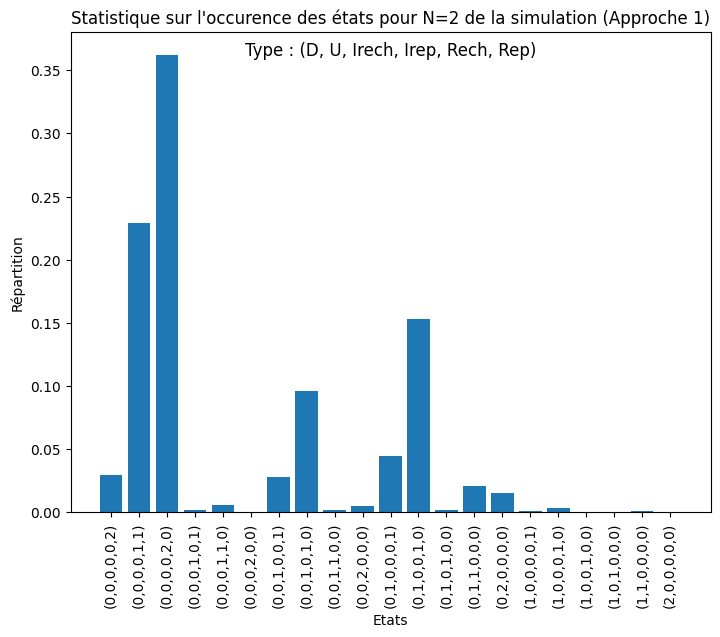

In [13]:
#State compteur va faire les statistiques des simulations
state_counter1 = {(i, j, k, l, m, n): 0 for i in range(N+1) for j in range(N+1) for k in range(
    N+1) for l in range(N+1) for m in range(N+1) for n in range(N+1) if i+j+k+l+m+n == N} #On exprime E


for i in range(N_simulation):
    t = 0  # Compteur du temps écoulé

    # Etat initial : On fait un tirage aléatoire
    inital_state = {"D": 0, "U": 0, "Irech": 0, "Irep": 0,
                    "Rech": 0, "Rep": 0}  
    pos_velos = random.choices(["D","U","Irech","Irep","Rech","Rep"],k=N)
    for pos_velo in pos_velos:
        inital_state[pos_velo] += 1
        
    state = inital_state
    ############################ SIMULATION i #############################
    while t < total_time:
        # On effectue les changement d'état
        time_spent, new_state = get_next_state(state)
        if time_spent+t<total_time: #On vérifie que le temps tiré ne dépasse pas le temps de la simulation
            state = new_state
        else : #On est à la fin de la simulation on reste dans le dernier état jusqu'à la fin de la simulation
            pass
        t += time_spent
    # On ajoute le dernier état rencontré à notre compteur pour la statistique
    state_tuple = tuple(state.values())
    state_counter1[state_tuple] += 1 #On ajoute au compteur l'état final de la simulation
    print("\rAvancée :",int(i/(N_simulation-1)*100),"%",end='') 
    ########################### FIN SIMULATION i #############################

total_occurrences = sum(state_counter1.values())
normalized_states_occurence1 = {key: value / total_occurrences for key, value in state_counter1.items()}

state_counter_string = [f"({i},{j},{k},{l},{m},{n})" for i in range(N+1) for j in range(N+1) for k in range(
    N+1) for l in range(N+1) for m in range(N+1) for n in range(N+1) if i+j+k+l+m+n == N] #On exprime E

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(state_counter_string, list(normalized_states_occurence1.values()))
plt.xticks(rotation=90)
plt.xlabel('Etats')
plt.title(f"Statistique sur l'occurence des états pour N={N} de la simulation (Approche 1)")
plt.ylabel('Répartition')
plt.suptitle("Type : (D, U, Irech, Irep, Rech, Rep)")
plt.show()

#### **Simu 2** : statistique sur les temps moyens passés

Dans un second temps, pour faire les statistique de la simulation, on utilise le fait que les temps moyens passés dans les états intermédiaires une approximation de la probabilité stationnaire en utilisant le théorème ergodique.

Dans ```state_counter2``` on enregistre temps passés dans chaque état des différentes simulations.

Avancée : 100 %

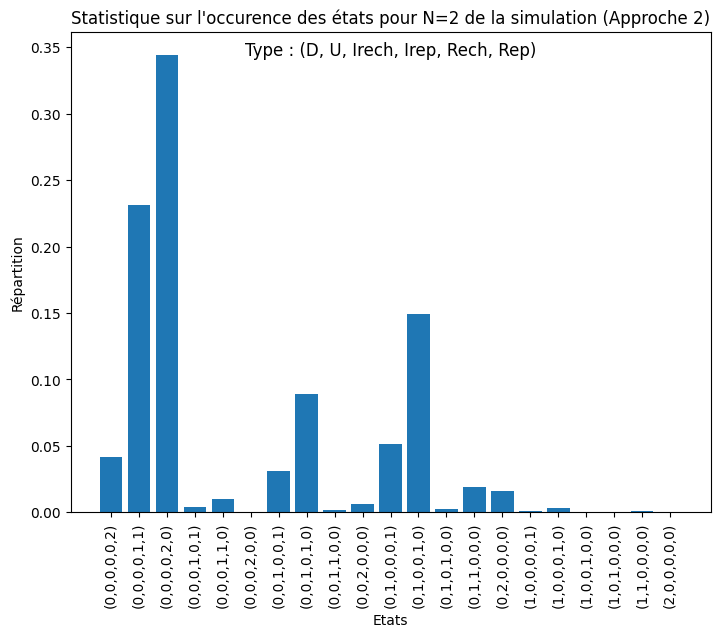

In [14]:
#State compteur va faire les statistiques des simulations
state_counter2 = {(i, j, k, l, m, n): 0 for i in range(N+1) for j in range(N+1) for k in range(
    N+1) for l in range(N+1) for m in range(N+1) for n in range(N+1) if i+j+k+l+m+n == N} #On exprime E


for i in range(N_simulation):
    t = 0  # Compteur du temps écoulé

    # Etat initial : On fait un tirage aléatoire
    inital_state = {"D": 0, "U": 0, "Irech": 0, "Irep": 0,
                    "Rech": 0, "Rep": 0}  
    pos_velos = random.choices(["D","U","Irech","Irep","Rech","Rep"],k=N)
    for pos_velo in pos_velos:
        inital_state[pos_velo] += 1
        
    state = inital_state
    
    while t < total_time:
        # On effectue les changement d'état
        time_spent, new_state = get_next_state(state)
        if time_spent+t<total_time: #On vérifie que le temps tiré ne dépasse pas le temps de la simulation
            
            state_tuple = tuple(state.values())
            state = new_state
            state_counter2[state_tuple] += time_spent #On ajoute au compteur le temps passé dans l'état i
        else : #On est à la fin de la simulation on reste dans le dernier état jusqu'à la fin de la simulation
            pass
        t += time_spent
    # On ajoute le dernier état rencontré à notre compteur pour la statistique
    print("\rAvancée :",int(i/(N_simulation-1)*100),"%",end='') 

total_occurrences = sum(state_counter2.values())
normalized_states_occurence2 = {key: value / total_occurrences for key, value in state_counter2.items()}

state_counter_string = [f"({i},{j},{k},{l},{m},{n})" for i in range(N+1) for j in range(N+1) for k in range(
    N+1) for l in range(N+1) for m in range(N+1) for n in range(N+1) if i+j+k+l+m+n == N] #On exprime E

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(state_counter_string, list(normalized_states_occurence2.values()))
plt.xticks(rotation=90)
plt.xlabel('Etats')
plt.title(f"Statistique sur l'occurence des états pour N={N} de la simulation (Approche 2)")
plt.ylabel('Répartition')
plt.suptitle("Type : (D, U, Irech, Irep, Rech, Rep)")
plt.show()

#### Calcul de la probabilité stationnaire théorique

Dans le code ci dessous, on calcule les valeurs théoriques de la probabilité stationnaire que l'on enregistre dans ```stationnary_distribution```

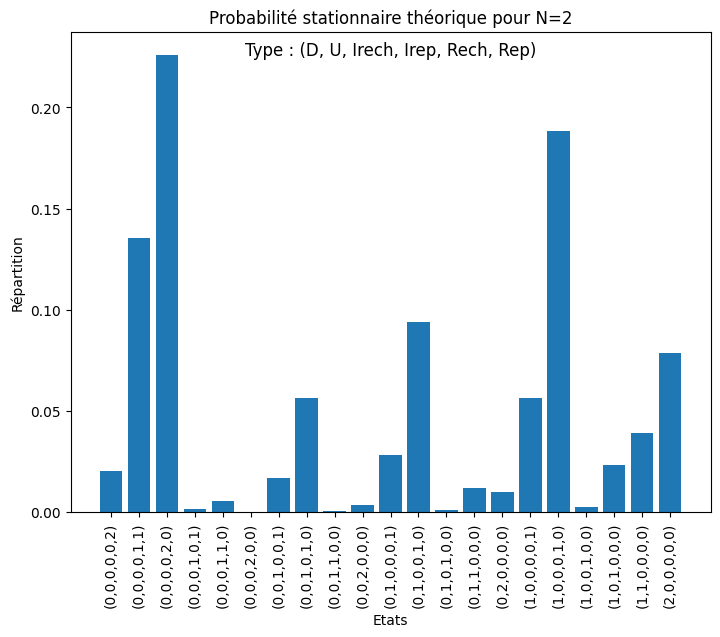

In [15]:
from math import factorial as fact

alpha_D = 0.2020202
alpha_U = 0.1010101

alpha_Irech = 0.06060606
alpha_Irep = 0.00606061
alpha_Rech = 0.48484848
alpha_Rep = 0.14545455

def non_normalized_stationary_distribution(state: tuple):
    res = (alpha_D ** state[0])*(alpha_U ** state[1]/fact(state[1]))*(alpha_Irech ** state[2]/fact(state[2]))*(
        alpha_Irep ** state[3]/fact(state[3]))*(alpha_Rech ** state[4]/fact(state[4]))*(alpha_Rep ** state[5]/fact(state[5]))
    return res

state_counter_model = {(i, j, k, l, m, n): 0 for i in range(N+1) for j in range(N+1) for k in range(
    N+1) for l in range(N+1) for m in range(N+1) for n in range(N+1) if i+j+k+l+m+n == N}  # On exprime E

for key, _ in state_counter_model.items():
    state_counter_model[key] = non_normalized_stationary_distribution(key)

total_occurrences = sum(state_counter_model.values())
stationnary_distribution = {
    key: value / total_occurrences for key, value in state_counter_model.items()}
state_counter_string = [f"({i},{j},{k},{l},{m},{n})" for i in range(N+1) for j in range(N+1) for k in range(
    N+1) for l in range(N+1) for m in range(N+1) for n in range(N+1) if i+j+k+l+m+n == N]  # On exprime E

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(state_counter_string, list(stationnary_distribution.values()))
plt.xticks(rotation=90)
plt.xlabel('Etats')
plt.title(f"Probabilité stationnaire théorique pour N={N}")
plt.ylabel('Répartition')
plt.suptitle("Type : (D, U, Irech, Irep, Rech, Rep)")
plt.show()

#### Vérification du modèle

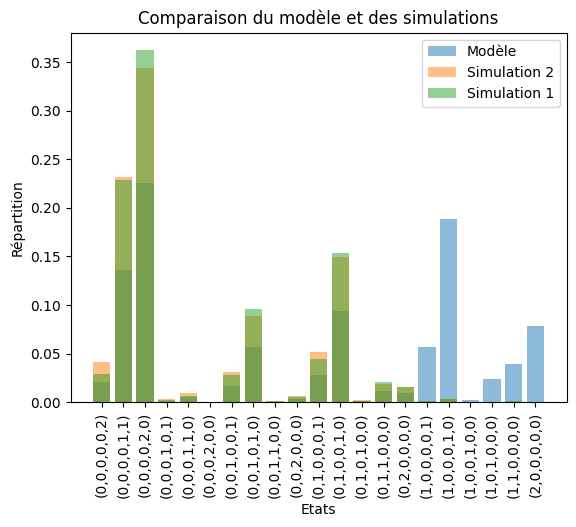

In [16]:
plt.bar(state_counter_string,list(stationnary_distribution.values()), alpha=0.5, label='Modèle')
plt.bar(state_counter_string,list(normalized_states_occurence2.values()), alpha=0.5, label='Simulation 2')
plt.bar(state_counter_string,list(normalized_states_occurence1.values()), alpha=0.5, label='Simulation 1')
plt.xticks(rotation=90)
plt.title("Comparaison du modèle et des simulations")
plt.ylabel("Répartition")
plt.xlabel("Etats")
plt.legend()
plt.show()

In [17]:
def check_validity(state_counter1, state_counter_2):
    """Must be normalized statistics
    This function calculates the validity of the model by calculating the euclidian norm between the theory and the simulations"""
    res = 0
    for i in range(6):
        res += abs(state_counter1[i]-state_counter_2[i])
    return np.sqrt(res)


print("Différence de résultats entre simu 1 et modèle théorique :", check_validity(tuple(
    normalized_states_occurence1.values()), tuple(stationnary_distribution.values())), f"pour N_simu={N_simulation}")
print("Différence de résultats entre simu 2 et modèle théorique :", check_validity(tuple(
    normalized_states_occurence2.values()), tuple(stationnary_distribution.values())), f"pour N_simu={N_simulation}")

Différence de résultats entre simu 1 et modèle théorique : 0.48937825313964256 pour N_simu=2000
Différence de résultats entre simu 2 et modèle théorique : 0.4911881344309395 pour N_simu=2000


La simulation 1 permet d'approcher la probabilité stationnaire du modèle théorique car lorsqu'on augmente le nombre de simuations, on diminue la différence entre les deux résulats (0.02 avec 200 simus et 0.006 avec 2000 simus)

La simulation 2 , bien qu'ayant une différence plus grande avec le modèle théorique, permet elle aussi de l'approcher.

Nous avaons tracé le graphique montrant la différence entre le modèle théorique et les simulations en fonction du nombre de simulations que l'on a fait afin de montrer que cette différence tendait vers 0 lorsque le nombre de simulations tendait vers l'infini (loi des grands nombre). Le graphique est ci-dessous. Le code permettant de le généré n'a pas été affiché car il est long et que la moajorité de ce dernier est un copié collé du code des deux simulations (on a juste ajouté le fait que N_simualtions variait entre 1 et 1000 suivant une échelle log).

![](difference_modeles.png)

In [18]:
import math

def intervalle_confiance(moyenne, nombre_simulations):
    niveau_confiance = 0.90

    nombre_simulations = np.sqrt(nombre_simulations)
    ecart_type_estime = np.sqrt(moyenne * (np.ones(len(moyenne)) - moyenne))


    erreur_standard = ecart_type_estime / math.sqrt(nombre_simulations)


    valeur_z = math.erf(1 - niveau_confiance)

    intervalle_bas = moyenne - valeur_z * erreur_standard
    intervalle_haut = moyenne + valeur_z * erreur_standard

    return [intervalle_bas, intervalle_haut]

intervalle_confiance1 = intervalle_confiance(np.array(list(
    normalized_states_occurence1.values())), N_simulation)
intervalle_confiance2 = intervalle_confiance(np.array(list(
    normalized_states_occurence2.values())), N_simulation)
moyenne_theorique = np.array(list(stationnary_distribution.values()))

is_in1 = []
is_in2 = []
for i in range(len(moyenne_theorique)):
    if moyenne_theorique[i] > intervalle_confiance1[0][i] and moyenne_theorique[i] < intervalle_confiance1[1][i]:
        is_in1.append(1)
    else :
        is_in1.append(0)
    if moyenne_theorique[i] > intervalle_confiance2[0][i] and moyenne_theorique[i] < intervalle_confiance2[1][i]:
        is_in2.append(1)
    else :
        is_in2.append(0)

print("Le modèle rentre dans l'intervalle de confinace de la simulation dans :",np.round(sum(is_in1)/len(is_in1)*100,0),"% des états")
print("Le modèle rentre dans l'intervalle de confinace de la simulation dans :",np.round(sum(is_in2)/len(is_in2)*100,0),"% des états")

Le modèle rentre dans l'intervalle de confinace de la simulation dans : 14.0 % des états
Le modèle rentre dans l'intervalle de confinace de la simulation dans : 5.0 % des états


On constate que même si la différence entre le modèle théorique et les simulations diminue lorsuque l'on augmente le nombre de simulations, il reste un biais entre les deux qui ne tent pas é diminuer, et qui fait que les intervalles de confinace sont pas ou peu respectées. Je dois avouer que je ne sais pas d'où cela vien, en sachant que les résultats obtenus restent malgré tout cohérents.

### 6)

Si l'on considère un nombre fini de prestataire et un nombre fini de techniciens, il faudrait changer les valeurs :
- $q_{U \rightarrow Irech} = n_U \frac{p_{vide}}{t_{trajet}}$ par $q_{U \rightarrow Irech} = \min(n_U,n_p) \frac{p_{vide}}{t_{trajet}}$

- $q_{U \rightarrow Irep} = n_U \frac{p_{panne}}{t_{trajet}}$ par $q_{U \rightarrow Irep} = \min(n_U,n_t) \frac{p_{panne}}{t_{trajet}}$